In [1]:
import numpy as np
import matplotlib.pylab as plt
from math import exp,log,sqrt,pi,sin
%matplotlib inline

In [2]:
X = np.random.exponential(2,1000)

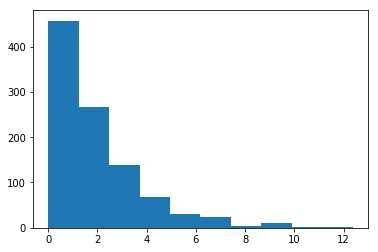

In [3]:
p = plt.hist(X)

In [4]:
n = len(X)
def Fn(x):
    return((1/n)*sum([1*(X[i]<=x) for i in range(n)]))
def U(x,a):
    e = sqrt((log(2/a))/(2*n))
    return(min(1,Fn(x)+e))
def L(x,a):
    e = sqrt((log(2/a))/(2*n))
    return(max(Fn(x)-e,0))

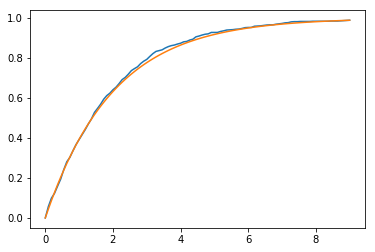

In [5]:
p = plt.plot(np.linspace(0,9,100),[Fn(x) for x in np.linspace(0,9,100)])
p = plt.plot(np.linspace(0,9,100),[1-exp(-x/2) for x in np.linspace(0,9,100)])

In [6]:
F0 = lambda x:1-exp(-x/2)

In [7]:
X.sort()

In [8]:
Dn = max([max(i/n-F0(X[i]),F0(X[i])-(i-1)/n) for i in range(n)])
Dn

0.027771497603864326

In [9]:
Cn = 1/(12*n) + sum([(F0(X[i])-(2*i-1)/n)**2 for i in range(n)])
Cn

340.05504197444714

In [10]:
An = -n-(1/n)*(sum([(2*i-1)*(log(F0(X[i]))+log(1-F0(X[n-i-1]))) for i in range(n)]))
An

-3.1483664600386874

In [11]:
def BB(dt):
    T = np.arange(0,1+dt,dt)
    n = len(T)
    B = np.ones(n)*0
    for i in range(n):
        xi = sqrt(2)*np.random.randn()/((i+1)*pi)
        B = B + xi*np.array([sin((i+1)*pi*t) for t in T])
    return B

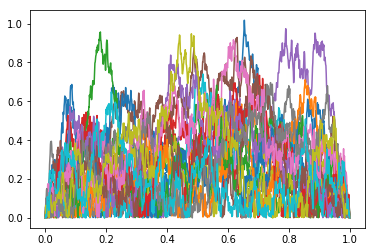

In [53]:
for _ in range(20):
    plt.plot(np.linspace(0,1,1001),abs(BB(0.001)))

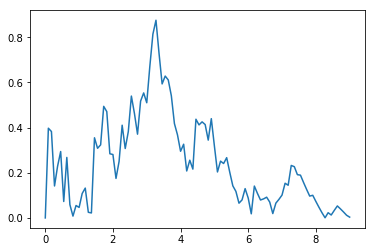

In [59]:
p = plt.plot(np.linspace(0,9,100),[sqrt(n)*abs(Fn(x)-F0(x)) for x in np.linspace(0,9,100)])

In [54]:
sim =[]
for _ in range(3000):
    sim.append(max(abs(BB(0.01))))

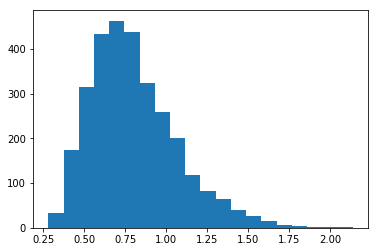

In [55]:
p = plt.hist(sim,bins=20)

In [56]:
np.quantile(sim,q=0.95)

1.3163934332467193

In [63]:
S = lambda x :1-2*sum([(-1)**(j-1)*exp(-2*(j**2)*(x**2)) for j in range(1,3000)])

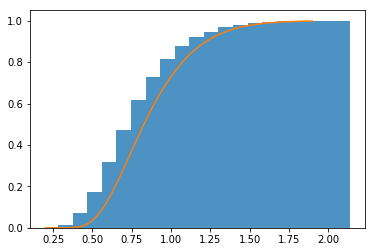

In [64]:
p = plt.hist(sim,bins=20,density=True,cumulative=True,alpha=0.8)
p = plt.plot(np.linspace(0.2,1.9,100),[S(x) for x in np.linspace(0.2,1.9,100)])